<a href="https://colab.research.google.com/github/sleepynayng/DL/blob/main/%5BTensorflow_2_1%5D_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Simple Linear Regression </h1>

In [ ]:
import tensorflow as tf

In [ ]:
# 1개가 뜨면 정상작동
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Version :", tf.__version__)

Num GPUs Available:  0
Version : 2.10.0


In [ ]:
# Prepare data
population_inc = [0.3, -0.78, 1.26, 0.30, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85,
                 -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.81, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74,
                 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

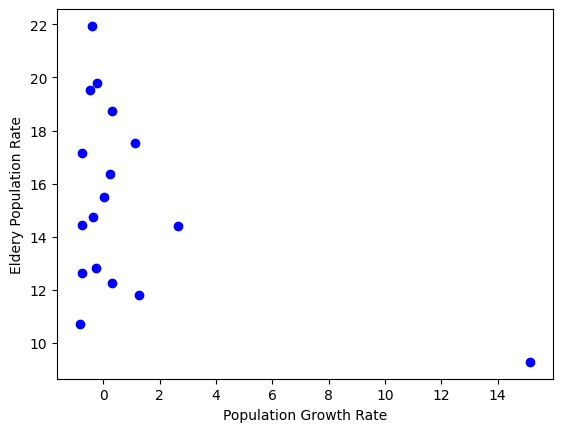

In [ ]:
# Visualizaion
# Result : (15.17, 9.29) 데이터를 outlier로 판단하고 제거
import matplotlib.pyplot as plt
plt.plot(population_inc, population_old, "bo")
plt.xlabel("Population Growth Rate")
plt.ylabel("Eldery Population Rate")
plt.show()

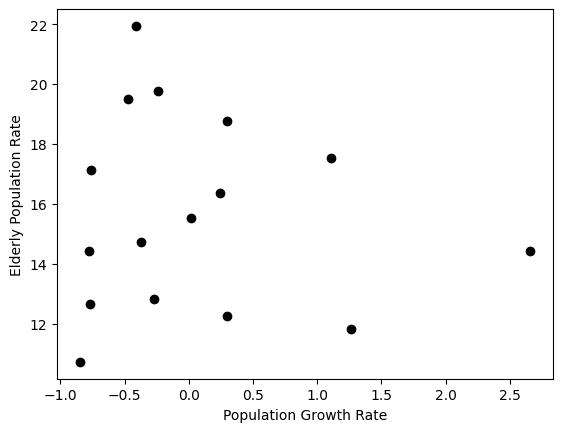

In [ ]:
# Prepare data
population_inc_clean = population_inc[:5] + population_inc[6:]
population_old_clean = population_old[:5] + population_old[6:]
plt.plot(population_inc_clean, population_old_clean, "ko")
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()

In [ ]:
# 선형회귀(Linear Regression)
# hypothesis : Y_hat = f(X) = A'X + B (matrix form)
# residual(error) : E = Y_hat - Y = A'X + B - Y (matrix form)
# loss function(L) : MSE(mean squared error), mean(sqrt(y_hat - y)) = mean(sqrt(E))
# optimizer : Minimize(L; A,B)

import numpy as np
import matplotlib.pyplot as plt
import math

X = np.array(population_inc_clean)
Y = np.array(population_old_clean)
X_bar = np.mean(X); print("Mean(X):",round(X_bar,4))
Y_bar = np.mean(Y); print("Mean(Y):",round(Y_bar,4))


Mean(X): 0.0606
Mean(Y): 15.65


In [ ]:
# Get Parameter
a = np.sum((Y-Y_bar)*(X-X_bar))/np.sum((X-X_bar)**2); print("Slope :", a)
b = Y_bar - a * X_bar; print("Intercept :", b)

Slope : -0.2964565383836043
Intercept : 15.667972677639504


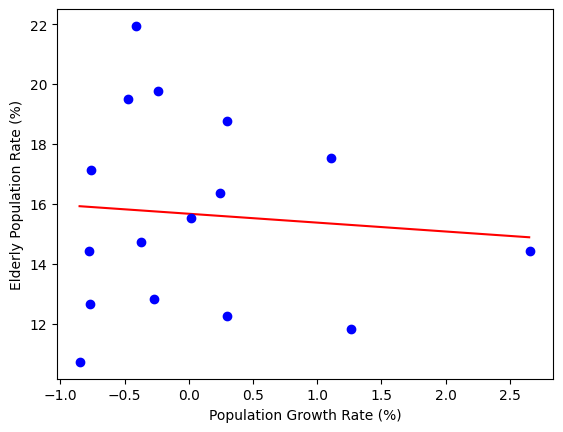

In [ ]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
plt.plot(line_x, line_y, "r-")
plt.plot(X, Y, "bo")
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

<h1>Linear Regression on Tensorflow</h1>

Init slope : <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.75610167>
Init intercept : <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.32669273>
[100times] Slope : 0.35820833Intercept : 6.705849loss:89.80524
[200times] Slope : 0.03037289Intercept : 11.194191loss:29.767113
[300times] Slope : -0.1604773Intercept : 13.806583loss:13.290383
[400times] Slope : -0.24996512Intercept : 15.031563loss:10.244168
[500times] Slope : -0.28345844Intercept : 15.49005loss:9.872458
[600times] Slope : -0.29349837Intercept : 15.627479loss:9.842574
[700times] Slope : -0.29591212Intercept : 15.660525loss:9.840997
[800times] Slope : -0.29637665Intercept : 15.66688loss:9.840942
[900times] Slope : -0.29644707Intercept : 15.667846loss:9.840942
[1000times] Slope : -0.29645544Intercept : 15.667957loss:9.840942


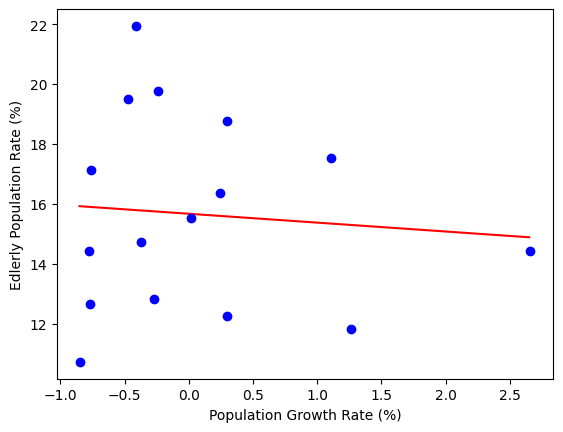

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.array(population_inc_clean)
Y = np.array(population_old_clean)

# Initialize slope and intercept parameter
a = tf.Variable(random.random()); print("Init slope :", a)
b = tf.Variable(random.random()); print("Init intercept :", b)

# function of MSE return
def compute_loss() :
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred)**2)
    return loss

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000) :
    optimizer.minimize(compute_loss, var_list=[a,b])
    if i % 100 == 99 :
        print("[",i+1, "times] Slope : ",a.numpy(), "Intercept : ",b.numpy(), "loss:", compute_loss().numpy(), sep="")

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# Visualization
plt.plot(line_x, line_y, "r-")
plt.plot(X,Y, "bo")
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Edlerly Population Rate (%)")
plt.show()